In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
temp_avg_last12=calc_temps('2016-08-20', '2016-08-30')
print(temp_avg_last12)

[(71.0, 78.08571428571429, 84.0)]


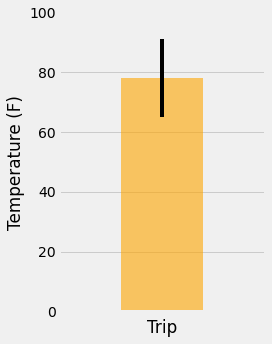

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = temp_avg_last12[0][2]-temp_avg_last12[0][0]
avg_temp = temp_avg_last12[0][1]
min_temp = temp_avg_last12[0][0]
max_temp = temp_avg_last12[0][2]

fig, ax = plt.subplots(figsize=(4,5))
bar_chart = ax.bar(1 , avg_temp, color= 'orange', tick_label='',yerr=error, alpha=0.6)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature (F)")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        
#label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
ax.xaxis.grid()
fig.tight_layout()
plt.show()

### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# station_rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation,func.sum(Measurement.prcp)).\
# filter(Measurement.station == Station.station).filter(Measurement.date >= date_year_ago).\
# group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
# station_rainfall
trip_start = '2016-08-20'
trip_end = '2016-08-30'

sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
result = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= trip_start).\
    filter(Measurement.date <= trip_end).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print (result)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 7.760000000000001), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 7.609999999999999), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 4.1899999999999995), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 2.55), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.4), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.69), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.06)]


In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [16]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]
# Set the start and end date of the trip
start_date = "08-20"
end_date = "08-30"
# Use the start and end date to create a range of dates
dates = [f"08-{num}" for num in range(20, 30)]



# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
for date in dates:
    norm = daily_normals(date)
    normals.extend(norm)
    
normals

[(68.0, 76.45283018867924, 82.0),
 (67.0, 76.4, 83.0),
 (69.0, 76.47169811320755, 84.0),
 (67.0, 76.6923076923077, 87.0),
 (70.0, 75.96153846153847, 84.0),
 (69.0, 76.96078431372548, 82.0),
 (71.0, 76.56862745098039, 84.0),
 (68.0, 76.28301886792453, 84.0),
 (67.0, 76.73469387755102, 86.0),
 (70.0, 76.23529411764706, 85.0)]

In [17]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
tmin = [x[0] for x in normals]
tavg = [x[1] for x in normals]
tmax = [x[2] for x in normals]

year_dates = [f"2016-{date}" for date in dates]
year_dates

trip_normals = pd.DataFrame({"tmin":tmin, "tavg":tavg, "tmax":tmax, "date":year_dates}, index=year_dates)
trip_normals.head()

,tmin,tavg,tmax,date
2016-08-20,68.0,76.452830,82.0,2016-08-20
2016-08-21,67.0,76.400000,83.0,2016-08-21
2016-08-22,69.0,76.471698,84.0,2016-08-22
2016-08-23,67.0,76.692308,87.0,2016-08-23
2016-08-24,70.0,75.961538,84.0,2016-08-24


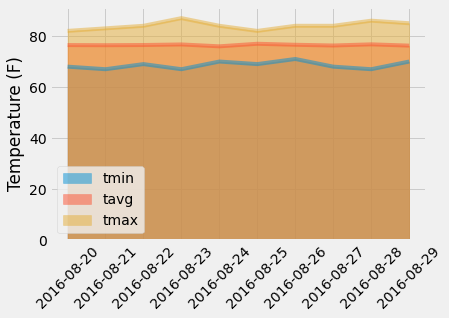

In [18]:
# Plot the daily normals as an area plot with `stacked=False`
trip_normals.plot(kind="area", stacked=False)
plt.legend(loc="best")
plt.ylabel("Temperature (F)")
plt.xticks(range(len(trip_normals["date"])), trip_normals["date"], rotation="45")
plt.show()

## Close Session

In [19]:
# Close Session
session.close()